In [168]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt



In [169]:
df = pd.read_csv('loan_approval_dataset.csv')
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [170]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


array([[<Axes: title={'center': 'loan_id'}>,
        <Axes: title={'center': ' no_of_dependents'}>,
        <Axes: title={'center': ' income_annum'}>],
       [<Axes: title={'center': ' loan_amount'}>,
        <Axes: title={'center': ' loan_term'}>,
        <Axes: title={'center': ' cibil_score'}>],
       [<Axes: title={'center': ' residential_assets_value'}>,
        <Axes: title={'center': ' commercial_assets_value'}>,
        <Axes: title={'center': ' luxury_assets_value'}>],
       [<Axes: title={'center': ' bank_asset_value'}>, <Axes: >,
        <Axes: >]], dtype=object)

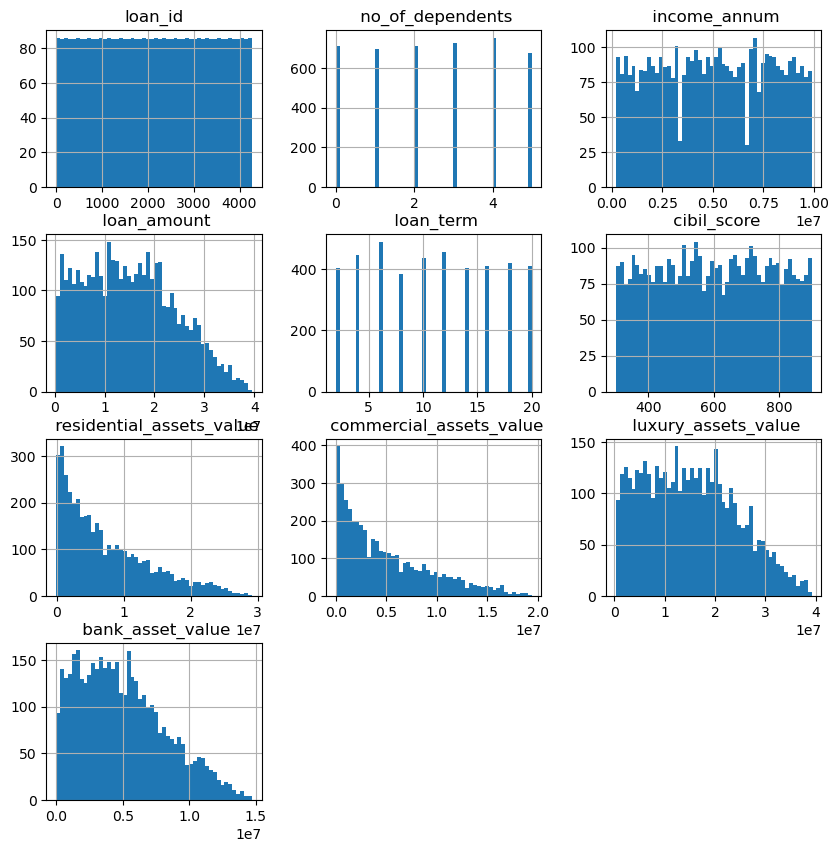

In [172]:
df.hist(bins=50,figsize=(10,10))

In [173]:
df = df.drop(columns='loan_id')

In [174]:
df.shape

(4269, 12)

In [175]:
df.isnull().sum()

 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [176]:
X = df.drop(columns=' loan_status')
y = df[' loan_status']

In [177]:
X

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000


Text(0, 0.5, 'Loan Amount')

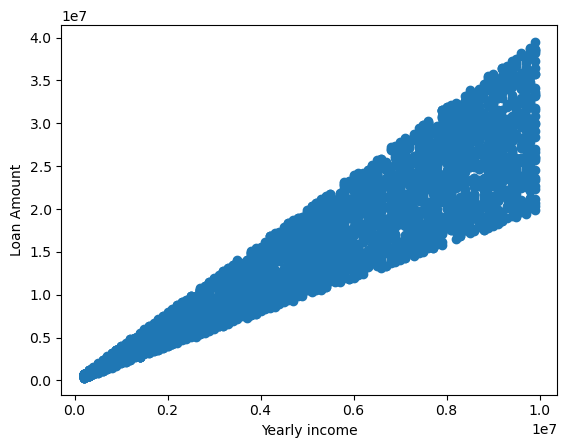

In [178]:
plt.scatter(X[' income_annum'],X[' loan_amount'])
plt.xlabel('Yearly income')
plt.ylabel('Loan Amount')

(array([424., 412., 430., 428., 439., 409., 457., 431., 429., 410.]),
 array([300., 360., 420., 480., 540., 600., 660., 720., 780., 840., 900.]),
 <BarContainer object of 10 artists>)

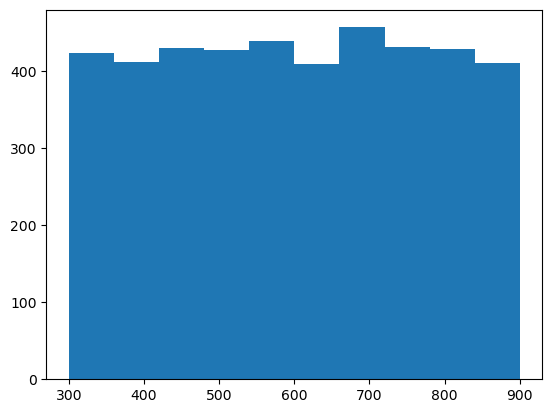

In [179]:
plt.hist(X[' cibil_score'])

([<matplotlib.patches.Wedge at 0x3114fe890>,
 [Text(-0.4118671696461923, 1.0199830560198708, 'Approved'),
  Text(0.41186726514389654, -1.0199830174580786, 'Rejected')])

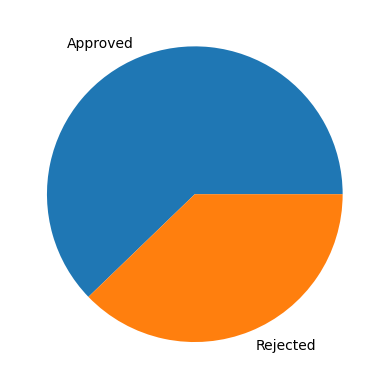

In [180]:
plt.pie(y.value_counts(),labels=('Approved','Rejected'))

In [181]:
le = LabelEncoder()
y = le.fit_transform(y)

Approved = 0
Not Approved = 1

In [182]:
y

array([0, 1, 1, ..., 1, 0, 0])

In [183]:
X[' education'] = (le.fit_transform(X[' education']))
X[' self_employed'] = (le.fit_transform(X[' self_employed']))

In [184]:
X[' education']

0       0
1       1
2       0
3       0
4       1
       ..
4264    0
4265    1
4266    1
4267    1
4268    0
Name:  education, Length: 4269, dtype: int64

In [185]:
X[' self_employed']

0       0
1       1
2       0
3       0
4       1
       ..
4264    1
4265    1
4266    0
4267    0
4268    0
Name:  self_employed, Length: 4269, dtype: int64

In [186]:
X.corr()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
no_of_dependents,1.000000,-0.002697,0.000765,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163
education,-0.002697,1.000000,0.023224,-0.011625,-0.010631,0.008417,0.004649,-0.010930,0.006763,-0.012471,-0.009424
self_employed,0.000765,0.023224,1.000000,0.002368,0.001450,0.004107,-0.004866,0.006144,-0.017998,0.004413,-0.000215
income_annum,0.007266,-0.011625,0.002368,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093
loan_amount,-0.003366,-0.010631,0.001450,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122
loan_term,-0.020111,0.008417,0.004107,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177
cibil_score,-0.009998,0.004649,-0.004866,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478
residential_assets_value,0.007376,-0.010930,0.006144,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418
commercial_assets_value,-0.001531,0.006763,-0.017998,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576
luxury_assets_value,0.002817,-0.012471,0.004413,0.929145,0.860914,0.012490,-0.028618,0.590932,0.591128,1.000000,0.788517


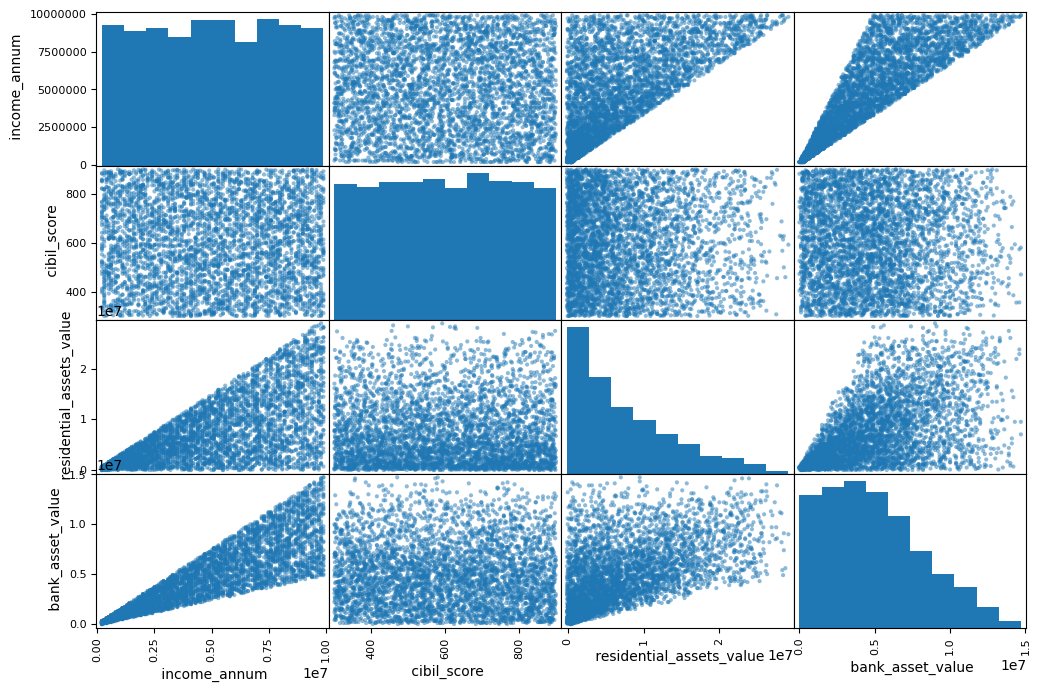

In [187]:
from pandas.plotting import scatter_matrix
attributes = [" income_annum", " cibil_score", " residential_assets_value",
                " bank_asset_value"]
scatter_matrix(X[attributes], figsize=(12, 8))
plt.show()

In [188]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [189]:
model = xgb.XGBClassifier(tree_method="hist", early_stopping_rounds=2,random_state=42)


In [190]:
model.fit(X_train,y_train,eval_set=[(X_test, y_test)])

[0]	validation_0-logloss:0.42766
[1]	validation_0-logloss:0.30289
[2]	validation_0-logloss:0.22559
[3]	validation_0-logloss:0.17306
[4]	validation_0-logloss:0.13517
[5]	validation_0-logloss:0.10770
[6]	validation_0-logloss:0.08927
[7]	validation_0-logloss:0.07568
[8]	validation_0-logloss:0.06474
[9]	validation_0-logloss:0.05681
[10]	validation_0-logloss:0.05085
[11]	validation_0-logloss:0.04636
[12]	validation_0-logloss:0.04182
[13]	validation_0-logloss:0.03918
[14]	validation_0-logloss:0.03716
[15]	validation_0-logloss:0.03613
[16]	validation_0-logloss:0.03452
[17]	validation_0-logloss:0.03261
[18]	validation_0-logloss:0.03202
[19]	validation_0-logloss:0.03108
[20]	validation_0-logloss:0.03107
[21]	validation_0-logloss:0.03055
[22]	validation_0-logloss:0.03011
[23]	validation_0-logloss:0.02964
[24]	validation_0-logloss:0.03024
[25]	validation_0-logloss:0.03039


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=2,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [191]:
y_pred = model.predict(X_test)

In [192]:
from sklearn.metrics import accuracy_score
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')

Accuracy Score: 0.9918032786885246


In [193]:
classification = classification_report(y_test, y_pred)
print(classification)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       526
           1       1.00      0.98      0.99       328

    accuracy                           0.99       854
   macro avg       0.99      0.99      0.99       854
weighted avg       0.99      0.99      0.99       854



In [194]:
# import joblib

# with open('xgb_model.pkl', 'wb') as f:
#     joblib.dump(model, f)